In [164]:
!pip install keras
!pip install nltk
!pip install tensorflow
!pip install seaborn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D , Conv2D,MaxPooling2D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import TensorBoard
import nltk 

from nltk.tokenize import sent_tokenize, word_tokenize
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
Name = "Grpah-2300-100"

tensorboard = TensorBoard(log_dir='Logs2/{}'.format(Name))
print(Name)

Grpah-2300-100


2021-08-15 13:49:38.921718: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-15 13:49:38.934659: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-15 13:49:39.000651: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [165]:
news_data = pd.read_csv("News_Dataset.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# print a summary of the data in news_data
print(news_data[1])
news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
news_data.head(20)


0       1-Septic
1       1-Septic
2         0-Pure
3         0-Pure
4       1-Septic
          ...   
1795      0-Pure
1796      0-Pure
1797      0-Pure
1798      0-Pure
1799      0-Pure
Name: 1, Length: 1800, dtype: object


,0,1
0,While the Congress seems to be in revival mode...,1
1,"In Congress, it’s a problem of plenty with too...",1
2,Though the BJP leadership has been reportedly ...,0
3,The political predicament also appears to be t...,0
4,"The party leadership, mainly PM Narendra Modi ...",1
5,The CM had planned to meet the duo when he com...,0
6,He’s now scheduled to visit New Delhi on Thurs...,0
7,Speculations are rife in party circles that he...,1
8,"“If he fails to do so, he would face open rebe...",0
9,“Further delay is likely. Despite threats from...,0


In [166]:
labels=news_data[1]
labels.head()     
print(type(labels))

<class 'pandas.core.series.Series'>


In [167]:
news_data[1].value_counts()

0    1431
1     369
Name: 1, dtype: int64

In [168]:
X = news_data[0]
Y=news_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
print(type(x_test))
print(x_train.shape , y_train.shape)

<class 'pandas.core.series.Series'>
(1710,) (1710,)


In [169]:
# tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)

# print(x_train)





from sklearn.feature_extraction.text import TfidfVectorizer
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
x_train=tfidf_vectorizer.fit_transform(x_train) 
x_test=tfidf_vectorizer.transform(x_test)

x_train=x_train.toarray()
x_test=x_test.toarray()
print(type(x_train))


<class 'numpy.ndarray'>


In [170]:
vocab_size = len(tfidf_vectorizer.vocabulary_)  
print(vocab_size)

# data = []
# punc = '.'
# for i in x_train:
#     i = i[:-1]
#     token = word_tokenize(i)
#     if punc in token:
#         for index ,val in enumerate(token):
#             if punc == val:
#                 token.pop(index) 
# #     x_train = tokenizer.texts_to_sequences(token)           
#     data.append(token)

# x_train = tokenizer.texts_to_sequences(data) 
# x_test = tokenizer.texts_to_sequences(x_test)

6927


In [79]:
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# print(x_train)
# news_data.info()

In [171]:
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train.shape , vocab_size)
print(type(y_test))
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')

(1710, 6927) 6927
<class 'numpy.ndarray'>


In [211]:
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
def add_conv_block(model):
    model.add(layers.Embedding(vocab_size, 500, input_length=vocab_size))
    model.add(layers.Conv1D(16, 5, activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    return model
model = Sequential()
model=add_conv_block(model)   
model=add_conv_block(model)

model.add(layers.Dense(10, activation='relu'))
#model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
X=np.array(x_train)
Y=np.array(y_train)
model.fit(X, Y,epochs=10,batch_size=10 , validation_split=0.1 , callbacks= [tensorboard])

Epoch 1/10
  1/154 [..............................] - ETA: 3:07 - loss: 0.6931 - accuracy: 0.7000

2021-08-15 15:50:47.311714: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-15 15:50:47.311754: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/154 [..............................] - ETA: 46s - loss: 0.6928 - accuracy: 0.7000 

2021-08-15 15:50:47.690404: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-08-15 15:50:47.693061: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-08-15 15:50:47.700137: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: Logs2/Grpah-2300-100/train/plugins/profile/2021_08_15_15_50_47

2021-08-15 15:50:47.706256: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to Logs2/Grpah-2300-100/train/plugins/profile/2021_08_15_15_50_47/swapnil.trace.json.gz
2021-08-15 15:50:47.711891: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: Logs2/Grpah-2300-100/train/plugins/profile/2021_08_15_15_50_47

2021-08-15 15:50:47.712235: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to Logs2/Grpah-2300-100/train/plugins/profile/2021_08_15_15_50_47/swapni

154/154 [==============================] - 30s 187ms/step - loss: 0.6043 - accuracy: 0.7940 - val_loss: 0.5681 - val_accuracy: 0.7953
Epoch 2/10
154/154 [==============================] - 26s 167ms/step - loss: 0.5130 - accuracy: 0.7940 - val_loss: 0.5500 - val_accuracy: 0.7953
Epoch 3/10
154/154 [==============================] - 26s 167ms/step - loss: 0.5129 - accuracy: 0.7947 - val_loss: 0.5631 - val_accuracy: 0.7953
Epoch 4/10
154/154 [==============================] - 26s 167ms/step - loss: 0.5121 - accuracy: 0.7940 - val_loss: 0.6571 - val_accuracy: 0.7953
Epoch 5/10
154/154 [==============================] - 26s 167ms/step - loss: 0.5137 - accuracy: 0.7940 - val_loss: 0.6036 - val_accuracy: 0.7953
Epoch 6/10
154/154 [==============================] - 26s 166ms/step - loss: 0.5134 - accuracy: 0.7940 - val_loss: 1.6665 - val_accuracy: 0.7953
Epoch 7/10
154/154 [==============================] - 26s 171ms/step - loss: 0.5138 - accuracy: 0.7947 - val_loss: 1.1181 - val_accuracy: 0.2

In [160]:
# from sklearn.linear_model import PassiveAggressiveClassifier
# #DataFlair - Initialize a PassiveAggressiveClassifier
# pac=PassiveAggressiveClassifier(max_iter=50)
# pac.fit(x_train,y_train)

# #DataFlair - Predict on the test set and calculate accuracy
# y_pred=pac.predict(x_test)
# score=accuracy_score(y_test,y_pred)
# print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 76.94%


In [203]:
acc , y = model.evaluate(x_test , y_test)

3/3 [==============================] - 36s 5s/step - loss: 0.5168 - accuracy: 0.8000


In [175]:
print(y_test)

[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [16]:
def mapper(a):
    a = tokenizer.texts_to_sequences(a)
    return pad_sequences(a, padding='post', maxlen=maxlen)


x_eval = mapper(['he said, "the world goes round and round and round"',
        'Even Bangladesh leader Khaleda Zia has said the terrorists are being trained in India and sent to Bangladesh to create disturbance'])

y_eval = np.array([0, 1])
model.evaluate(x_eval, y_eval)

for i in model.predict(x_eval):
    print(round(i[0]))

1/1 [==============================] - 0s 106ms/step - loss: 1.3386 - accuracy: 0.5000
0
0


In [190]:
y_pred = model.predict(x_test)
y_pred = [round(i[0]) for i in y_pred]

In [191]:
from sklearn.metrics import confusion_matrix
y = confusion_matrix(y_test, y_pred)
print(y)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

[[72  0]
 [18  0]]
Accuracy: 80.0%


<AxesSubplot:>

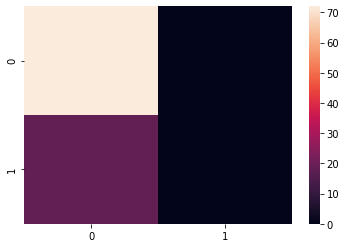

In [192]:
import seaborn as sns

sns.heatmap(y)

In [179]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 6927, 100)         692700    
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 6923, 16)          8016      
_________________________________________________________________
batch_normalization_13 (Batc (None, 6923, 16)          64        
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 16)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_40 (Dense)             (None, 5)               

In [204]:
news_data = pd.read_csv("FakeNewsOutput.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# print a summary of the data in news_data
#print(news_data[1])
print(news_data)
news_data[1] = news_data[1].replace('\n', '', regex=True).str.strip()
news_data.head(20)

         0                                                  1  2
0     3534  A day after the candidates squared off in a fi...  0
1     6265  VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...  1
2     3123  It's debate season, where social media has bro...  0
3     3940  Mitch McConnell has decided to wager the Repub...  0
4     2856  Donald Trump, the actual Republican candidate ...  0
...    ...                                                ... ..
1262  4986  Washington (CNN) President Barack Obama announ...  0
1263  5789  The revival of middle-class jobs has been one ...  0
1264  4338  "I can guarantee that," Obama answered when as...  0
1265  5924  Videos 30 Civilians Die In US Airstrike Called...  1
1266  6030  The retired neurosurgeon lashed out Friday mor...  0

[1267 rows x 3 columns]


,0,1,2
0,3534,A day after the candidates squared off in a fi...,0
1,6265,VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...,1
2,3123,"It's debate season, where social media has bro...",0
3,3940,Mitch McConnell has decided to wager the Repub...,0
4,2856,"Donald Trump, the actual Republican candidate ...",0
5,3031,Not all the claims in the vice presidential de...,0
6,4854,WASHINGTON—Top administration officials forcef...,0
7,5861,Top Dems want White House to call off Part B d...,0
8,307,Corrections and clarifications: An earlier ver...,0
9,2956,posted by Eddie Censorship by Facebook has bec...,1


In [206]:
xfake_test=news_data[1]
yfake_test=news_data[2]
print(type(xfake_test))

<class 'pandas.core.series.Series'>


In [207]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# #DataFlair - Initialize a TfidfVectorizer
# tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# #DataFlair - Fit and transform train set, transform test set
# xfake_test=tfidf_vectorizer.fit_transform(xfake_test.values.astype('U')) 
# #tfidf_test=tfidf_vectorizer.transform(x_test)



xfake_test=tfidf_vectorizer.transform(xfake_test.values.astype('U'))
xfake_test=xfake_test.toarray()
print(type(xfake_test))

<class 'numpy.ndarray'>


In [208]:
y_pred = model.predict(xfake_test)
y_pred = [round(i[0]) for i in y_pred]

In [209]:
yfake_test=np.array(yfake_test)
yfake_test = yfake_test.astype('float64')
acc , yfake = model.evaluate(xfake_test , yfake_test)

40/40 [==============================] - 29s 730ms/step - loss: 1.0989 - accuracy: 0.4964


In [198]:
from sklearn.metrics import confusion_matrix
y = confusion_matrix(yfake_test, y_pred)
print(y)
score=accuracy_score(yfake_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

[[629   0]
 [638   0]]
Accuracy: 49.64%
